## IMDB Reviews with GRU (and optional LSTM and Conv1D)

In [0]:
!pip install tensorflow==2.0.0

In [1]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0
# !pip install -q tensorflow-datasets

2.0.0


In [2]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
  
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

In [6]:
# Bidirectional Model Definition with GRU
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 77s 3ms/sample - loss: 0.5563 - accuracy: 0.6781 - val_loss: 0.3801 - val_accuracy: 0.8360
Epoch 2/50
25000/25000 [==============================] - 71s 3ms/sample - loss: 0.3209 - accuracy: 0.8692 - val_loss: 0.3483 - val_accuracy: 0.8503
Epoch 3/50
25000/25000 [==============================] - 70s 3ms/sample - loss: 0.2399 - accuracy: 0.9086 - val_loss: 0.3727 - val_accuracy: 0.8411
Epoch 4/50
25000/25000 [==============================] - 69s 3ms/sample - loss: 0.1819 - accuracy: 0.9337 - val_loss: 0.4276 - val_accuracy: 0.8366
Epoch 5/50
25000/25000 [==============================] - 69s 3ms/sample - loss: 0.1263 - accuracy: 0.9564 - val_loss: 0.4882 - val_accuracy: 0.8315
Epoch 6/50
25000/25000 [==============================] - 67s 3ms/sample - loss: 0.0880 - accuracy: 0.9710 - val_loss: 0.5660 - val_accuracy: 0.8198
Epoch 7/50
25000/25000 [==============================] 

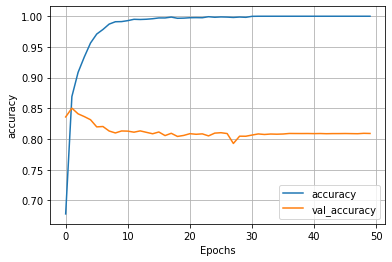

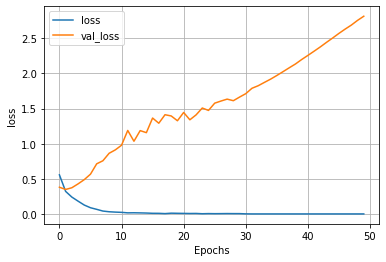

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.grid()
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
# Bidirectional Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [0]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
